In [1]:
#Gasoline_df, Crude_df, and WTI_prices have been split up 
#because they have different headers that have to be handled differently.

In [ ]:
# pip install EIA-python

In [2]:
import numpy as np
import pandas as pd
#import time dependencies
from datetime import datetime
import time
from datetime import date, timedelta
import datetime
#import statistics dependencies
from scipy.stats import linregress
#import matplotlib dependencies
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
# Import the API key.
from config import EIA_key
import eia
# Import the requests library.
import requests
import matplotlib as mpl

In [3]:
#might need to fix api call and change the series_id at the end
API_Call=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name_Gasoline= "U.S. Ending Stocks of Total Gasoline, Weekly"
Series_Name_Crude='U.S. Ending Stocks excluding SPR of Crude Oil, Weekly'
Series_Name_Price='West Texas Intermediate Crude Oil Price, Monthly'
Series_ID_Gasoline= "PET.WGTSTUS1.W"
Series_ID_Crude="PET.WCESTUS1.W"
Series_ID_Prices="STEO.WTIPUUS.M"
#install EIA package--- pip install EIA_python
#pip install pyOpenSSL to get around SSL error
#these are the API keys I set up
api_key = EIA_key
api = eia.API(api_key)


#import Gasoline data but still need to clean it
series_search = api.data_by_series(series=Series_ID_Gasoline)
gasoline_df = pd.DataFrame(series_search)

#import Crude data but still need to clean it
series_search = api.data_by_series(series=Series_ID_Crude)
crude_df = pd.DataFrame(series_search)

In [4]:
#this is the start and end date for matplotlib
start_date = "2019-09-01"
end_date =  datetime.datetime.now()
end_date= datetime.datetime.now()

In [5]:
#import Gasoline data but still need to clean it
series_search = api.data_by_series(series=Series_ID_Gasoline)
gasoline_df = pd.DataFrame(series_search)
# define a series and pass through api and Series_ID
def retrieve_time_series(api, Series_ID_Gasoline):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=Series_ID_Gasoline)
    ##Create a pandas dataframe from the retrieved time series
    global gasoline_df
    gasoline_df = pd.DataFrame(series_search)
    return gasoline_df
# define another function main to run the script through
def main():
    """
    Run main script
    """
    #Create EIA API using your specific API key
    api_key = EIA_key
    api = eia.API(api_key)
#     #Declare desired series ID
#     Series_ID="PET.WGTSTUS1.W"
    gasoline_df=retrieve_time_series(api, Series_ID_Gasoline)
    #Print the returned dataframe df
    print(df)
req = requests.get(API_Call, verify = False)

#Clean the dataframe by resetting the index because the date is automatically set as the index
gasoline_df.reset_index(inplace=True)
gasoline_df.rename(columns={'U.S. Ending Stocks of Total Gasoline, Weekly (Thousand Barrels)':'Gas Storage'}, inplace=True)
gasoline_df.rename(columns={'index':'Date'}, inplace=True)



#the days were repeated so we need to drop the last two days
test=gasoline_df['Date']
length = len(test)          # for reading and writing sakes, len(A): lenght of A
newtest = [None] * length          # newtest = [none, none, none], go look up empty array creation
strLen = 0 

for i in range(0, length):             # for loop
    str = test[i]                      # get n th element of test
    strLen = len(str)                  # for reading sake, the lenght of string that will be spliced
    gasoline_df['Date'][i] = str[0:strLen - 3] # n th element of newtest is the spliced n th element from test
    
print(gasoline_df)

#the rest of the dates was in a weird format so we have to get them into %Y%m%d format and then convert to datetime
def format_date(row_value):
    #split string on space and slice out the first two parts
    year=row_value.split(" ")[0]
    month=row_value.split(" ")[1][:2]
    day = row_value.split(" ")[1][2:]
    return f"{year}{month}{day}"
gasoline_df['Date']=gasoline_df['Date'].map(format_date)
gasoline_df['Date']=pd.to_datetime(gasoline_df['Date'].astype(int), format='%Y%m%d')

           Date  Gas Storage
0     1990 0105       210982
1     1990 0112       215395
2     1990 0119       219221
3     1990 0126       229695
4     1990 0202       234249
...         ...          ...
1598  2020 0821       239179
1599  2020 0828       234859
1600  2020 0904       231905
1601  2020 0911       231524
1602  2020 0918       227499

[1603 rows x 2 columns]


C:\Users\15124\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
#import Crude data but still need to clean it
series_search = api.data_by_series(series=Series_ID_Crude)
crude_df = pd.DataFrame(series_search)
# define a series and pass through api and Series_ID
def retrieve_time_series(api, Series_ID_Crude):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=Series_ID_Crude)
    ##Create a pandas dataframe from the retrieved time series
    global crude_df
    crude_df = pd.DataFrame(series_search)
    return crude_df
# define another function main to run the script through
def main():
    """
    Run main script
    """
    #Create EIA API using your specific API key
    api_key = EIA_key
    api = eia.API(api_key)
#     #Declare desired series ID
#     Series_ID="PET.WGTSTUS1.W"
    df=retrieve_time_series(api, Series_ID_Crude)
    #Print the returned dataframe df
    print(df)
req = requests.get(API_Call, verify = False)

#Clean the dataframe by resetting the index because the date is automatically set as the index
crude_df.reset_index(inplace=True)
crude_df.rename(columns={'U.S. Ending Stocks excluding SPR of Crude Oil, Weekly (Thousand Barrels)':'Crude'}, inplace=True)
crude_df.rename(columns={'index':'Date'}, inplace=True)



#the days were repeated so we need to drop the last two days
test=crude_df['Date']
length = len(test)          # for reading and writing sakes, len(A): lenght of A
newtest = [None] * length          # newtest = [none, none, none], go look up empty array creation
strLen = 0 

for i in range(0, length):             # for loop
    str = test[i]                      # get n th element of test
    strLen = len(str)                  # for reading sake, the lenght of string that will be spliced
    crude_df['Date'][i] = str[0:strLen - 3] # n th element of newtest is the spliced n th element from test



#the rest of the dates was in a weird format so we have to get them into %Y%m%d format and then convert to datetime
def format_date(row_value):
    #split string on space and slice out the first two parts
    year=row_value.split(" ")[0]
    month=row_value.split(" ")[1][:2]
    day = row_value.split(" ")[1][2:]
    return f"{year}{month}{day}"
crude_df['Date']=crude_df['Date'].map(format_date)
crude_df['Date']=pd.to_datetime(crude_df['Date'].astype(int), format='%Y%m%d')

C:\Users\15124\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
#import Pricing data but still need to clean it
series_search = api.data_by_series(series=Series_ID_Prices)
WTI_df= pd.DataFrame(series_search)
# define a series and pass through api and Series_ID
def retrieve_time_series(api, Series_ID_Prices):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=Series_ID_Prices)
    ##Create a pandas dataframe from the retrieved time series
    global WTI_df
    WTI_df = pd.DataFrame(series_search)
    return df
# define another function main to run the script through
def main():
    """
    Run main script
    """
    #Create EIA API using your specific API key
    api_key = EIA_key
    api = eia.API(api_key)
#     #Declare desired series ID
#     Series_ID="PET.WGTSTUS1.W"
    WTI_df=retrieve_time_series(api, Series_ID_Prices)
    #Print the returned dataframe df
    print(df)
req = requests.get(API_Call, verify = False)

#Clean the dataframe by resetting the index because the date is automatically set as the index
WTI_df.reset_index(inplace=True)
WTI_df.rename(columns={'West Texas Intermediate Crude Oil Price, Monthly (dollars per barrel)':'Crude Price'}, inplace=True)
WTI_df.rename(columns={'index':'Date'}, inplace=True)
# #the days were repeated so we need to drop the last two days
# test=WTI_df['Date']
# length = len(test)          # for reading and writing sakes, len(A): lenght of A
# newtest = [None] * length          # newtest = [none, none, none], go look up empty array creation
# strLen = 0 
# for i in range(0, length):             # for loop
#     str = test[i]                      # get n th element of test
#     strLen = len(str)                  # for reading sake, the lenght of string that will be spliced
#     WTI_df['Date'][i] = str[0:strLen - 3] # n th element of newtest is the spliced n th element from test
# #the rest of the dates was in a weird format so we have to get them into %Y%m%d format and then convert to datetime
# def format_date(row_value):
#     #split string on space and slice out the first two parts
#     year=row_value.split(" ")[0]
#     month=row_value.split(" ")[1][:2]
#     return f"{year}{month}"
WTI_df['Date']=WTI_df['Date'].map(format_date)
WTI_df['Date']=pd.to_datetime(WTI_df['Date'].astype(int), format='%Y%m')

In [8]:
gasoline_date_df=gasoline_df[(gasoline_df['Date']>start_date) & (gasoline_df['Date']< end_date)]
crude_date_df=crude_df[(crude_df['Date']>start_date) & (crude_df['Date']< end_date)]
WTI_date_df=WTI_df[(WTI_df['Date']>start_date) & (WTI_df['Date']< end_date)]

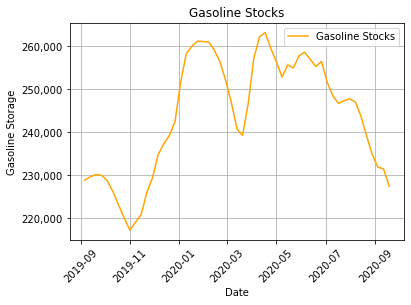

In [9]:
# plot just crude prices on one graph
fig, ax1=plt.subplots(frameon=False)

ax1.set_xlabel('Date')
ax1.set_ylabel('Gasoline Storage')
ax1.plot(gasoline_date_df['Date'],gasoline_date_df['Gas Storage'], color='orange')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Gasoline Stocks")


ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()


# defining legend style and data
blue_line = mlines.Line2D([], [], color='orange', label='Gasoline Stocks')
plt.legend(handles=[blue_line])
plt.savefig("GasolineAPI.png", bbox_inches='tight')

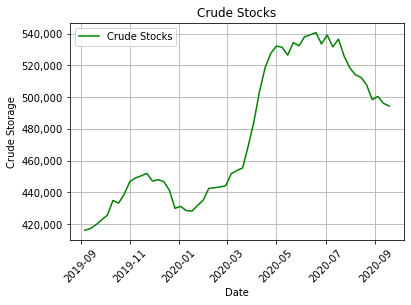

In [10]:
# plot just crude prices on one graph
fig, ax1=plt.subplots(frameon=False)

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage')
ax1.plot(crude_date_df['Date'],crude_date_df['Crude'], color='g')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Crude Stocks")
        

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='g', label='Crude Stocks')
plt.legend(handles=[blue_line])
plt.savefig("CrudeAPI.png", bbox_inches='tight')

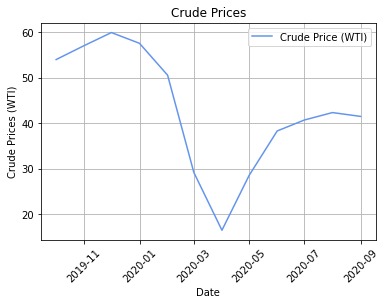

In [11]:
# WTI prices
fig, ax1=plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Prices (WTI)')
ax1.plot(WTI_date_df['Date'], WTI_date_df['Crude Price'], color='CornflowerBlue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Crude Prices")
ax1.grid()

# defining legend style and data
# green_line = mlines.Line2D([], [], color='orange', label='Crude Storage')
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Crude Price (WTI)')
plt.legend(handles=[blue_line],loc='upper right')
plt.savefig("Crude Prices.png", bbox_inches='tight')

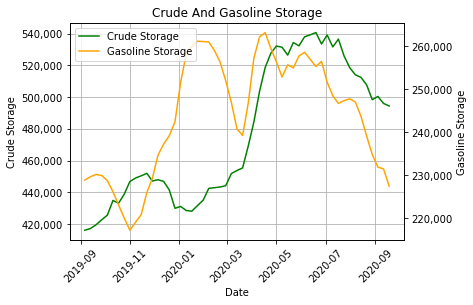

In [12]:
# plot crude storage and gasoline storage on one graph with two axes
fig, ax1=plt.subplots(frameon=False)
ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage')
ax1.plot(crude_date_df['Date'],crude_date_df['Crude'], color='g')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Crude And Gasoline Storage")
ax1.grid(False)


ax2=ax1.twinx()
ax2.set_ylabel('Gasoline Storage')
ax2.plot(gasoline_date_df['Date'], gasoline_date_df['Gas Storage'], color='orange')
ax2.tick_params(axis='y')

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax1.grid()

# defining legend style and data
green_line = mlines.Line2D([], [], color='g', label='Crude Storage')
orange_line = mlines.Line2D([], [], color='orange', label='Gasoline Storage')
plt.legend(handles=[green_line, orange_line], loc='upper left')

plt.savefig("Crude And Gasoline Storage API.png", bbox_inches='tight')

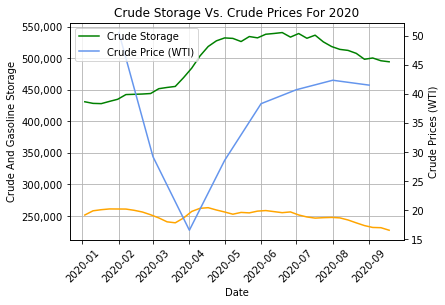

In [17]:
# plot showing crude stocks on prices for only 2020
# this is for long term outlook
start_date_crude = "2020-01-01"
end_date_crude =  datetime.datetime.now()
crude_date_storage_df = crude_df[(crude_df['Date']> start_date_crude) & (crude_df['Date']< end_date_crude)]
WTI_date_storage_df = WTI_df[(WTI_df['Date']> start_date_crude) & (WTI_df['Date']< end_date_crude)]
gasoline_date_date_df=gasoline_df[(gasoline_df['Date']>start_date_crude)& (gasoline_df['Date']< end_date_crude)]
# plot just crude prices on one graph
fig, ax1=plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude And Gasoline Storage')
ax1.plot(crude_date_storage_df['Date'],crude_date_storage_df['Crude'], color='g')
ax1.plot(gasoline_date_date_df['Date'],gasoline_date_date_df['Gas Storage'], color='orange')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Crude Storage Vs. Crude Prices For 2020")

ax2=ax1.twinx()
ax2.set_ylabel('Crude Prices (WTI)')
ax2.plot(WTI_date_storage_df['Date'], WTI_date_storage_df['Crude Price'], color='CornflowerBlue')
ax2.tick_params(axis='y')


ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()



# defining legend style and data
green_line = mlines.Line2D([], [], color='g', label='Crude Storage')
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Crude Price (WTI)')
plt.legend(handles=[green_line,blue_line],loc='upper left')
plt.savefig("Crude Storage Vs. Crude Prices For 2020.png", bbox_inches='tight')

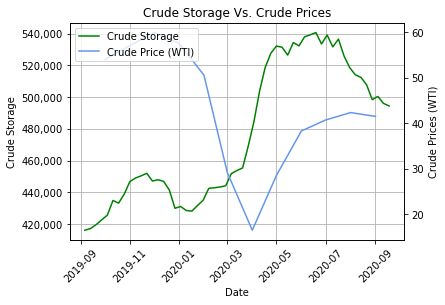

In [18]:
# plot just crude prices on one graph
fig, ax1=plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage')
ax1.plot(crude_date_df['Date'],crude_date_df['Crude'], color='g')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Crude Storage Vs. Crude Prices")

ax2=ax1.twinx()
ax2.set_ylabel('Crude Prices (WTI)')
ax2.plot(WTI_date_df['Date'], WTI_date_df['Crude Price'], color='CornflowerBlue')
ax2.tick_params(axis='y')


ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()


# defining legend style and data
green_line = mlines.Line2D([], [], color='g', label='Crude Storage')
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Crude Price (WTI)')
plt.legend(handles=[green_line,blue_line],loc='upper left')
plt.savefig("Crude Storage Vs. Crude Prices.png", bbox_inches='tight')

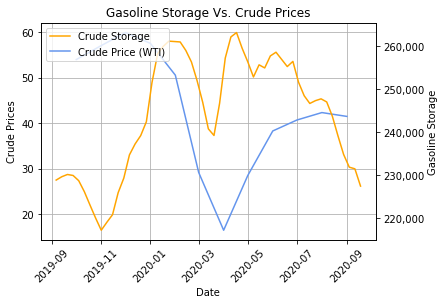

In [15]:
# plot Gasoline Storage and Prices

fig, ax1=plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Prices')
ax1.plot(WTI_date_df['Date'], WTI_date_df['Crude Price'], color='CornflowerBlue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Gasoline Storage Vs. Crude Prices")

ax2=ax1.twinx()
ax2.set_ylabel('Gasoline Storage')
ax2.plot(gasoline_date_df['Date'], gasoline_date_df['Gas Storage'], color='orange')
ax2.tick_params(axis='y')
ax1.grid()

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# defining legend style and data
green_line = mlines.Line2D([], [], color='orange', label='Crude Storage')
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Crude Price (WTI)')
plt.legend(handles=[green_line,blue_line],loc='upper left')
plt.savefig("Gasoline Storage Vs. Crude Prices.png", bbox_inches='tight')

In [16]:
gasoline_df.to_csv("Data/GasolineCleaned(9.5).csv")
crude_df.to_csv("Data/CrudeCleaned(9.5).csv")
WTI_df.to_csv("Data/WTIPricesCleaned(9.5).csv")